In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import numpy as np

In [2]:
# load the predictions
def load_deepbake_pred():
    preds = glob("deepbake_s12*predictions.tsv")
    df = pd.concat([pd.read_csv(f,sep='\t') for f in preds],ignore_index=True)
    df.sort_values(['episode','finalist'],inplace=True)
    return df

In [3]:
df = load_deepbake_pred()
df.tail(12)

,season,baker,episode,tech_mean,tech,mean_star,star,mean_good,good,mean_bad,bad,preds,bottom,finalist,top3,fifthseventh,thirdforth
72,12,Amanda,7,0.831719,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.0,2,0.00,0.09,0.28,0.00,99.71
81,12,Maggie,7,0.444444,0.000000,0.000000,0.0,0.444444,0.0,0.818182,0.0,2,0.04,0.62,1.81,0.04,98.11
78,12,Jairzinho,7,0.107390,0.000000,0.000000,0.0,0.000000,0.0,0.666667,0.0,2,0.13,0.72,1.82,0.12,97.93
82,12,Rochica,7,0.553173,0.000000,0.000000,0.0,0.000000,0.0,0.444444,0.0,2,0.19,1.30,3.29,0.18,96.33
75,12,Freya,7,0.222222,0.000000,0.000000,0.0,0.666667,0.0,0.666667,0.0,2,0.16,2.05,5.67,0.16,94.02
83,12,Tom,7,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.444444,0.0,2,0.58,2.07,4.86,0.53,94.03
76,12,George,7,0.916427,1.000000,0.000000,0.0,0.444444,0.0,1.000000,1.0,0,0.08,18.49,57.23,0.14,42.55
80,12,Lizzie,7,0.589189,0.909091,0.000000,0.0,0.444444,0.0,0.444444,1.0,0,0.45,29.34,70.93,0.74,27.88
73,12,Chigs,7,0.732491,0.727273,0.777778,0.0,0.666667,1.0,0.000000,0.0,0,0.35,37.66,74.55,0.54,24.56
74,12,Crystelle,7,1.000000,0.818182,0.777778,0.0,0.802469,1.0,0.000000,0.0,0,0.19,38.16,76.23,0.31,23.26


In [4]:
eliminated = [
    'Tom',
    'Jairzinho',
    'Rochica',
    'Maggie',
    'Freya',
    'Amanda'
]

In [5]:
def plot_deepbake_probs(df,prob,eliminated,title,ymax=100):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    f, ax = plt.subplots(1,1,figsize=(8,5))

    sns.pointplot(
        x='episode',
        y=prob,
        hue='baker',
        data=df[~df['baker'].isin(eliminated)].sort_values(['episode',prob],ascending=False),
        palette='Paired',
        ax=ax
    )
    ax.set(
        xlabel='Week',
        ylabel=f'Probability [%]',
        title=f'{title}',
        yticks=[x for x in range(0,ymax+10,10)]
        
    )
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    png = f'deepbake_{prob}_week{max(df["episode"])}.png'
    f.tight_layout()
    f.savefig(png,dpi=350,bbox_inches='tight')

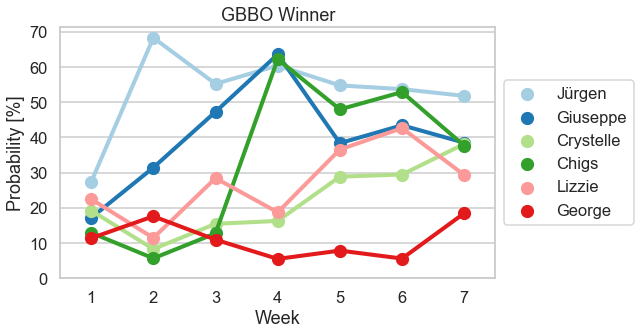

In [6]:
plot_deepbake_probs(df,'finalist',eliminated,'GBBO Winner',70)

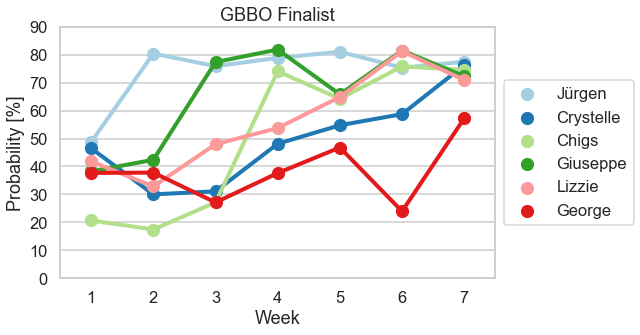

In [7]:
plot_deepbake_probs(df,'top3',eliminated,'GBBO Finalist',90)

In [8]:
def color_fader(c1,c2,mix=0): 
    #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

In [9]:
episode = 5

df = load_deepbake_pred()

rename_cols = {
    'baker' : 'Baker',
    'finalist' : 'GBBO Winner',
    'top3' : 'GBBO Finalist',
    'thirdforth' : '3rd-4th Place',
}

keep_cols = ['baker','episode','finalist','top3','thirdforth']

df = df[keep_cols].rename(columns=rename_cols)
df = df[(df['episode']==episode) & (~df['Baker'].isin(eliminated))].drop(columns=['episode'])
c1, c2 = '#1cf1b8','#fbfffe'

pal = [color_fader(c2,c1, (i)/2) for i in range(2)]
#[color_fader(c1,c2,(i+1)/len(df)) for i in range(len(df))]
pal = mpl.colors.LinearSegmentedColormap.from_list('',[c2,c1])#pal)

df = df.sort_values(['GBBO Winner','GBBO Finalist', '3rd-4th Place'],ascending= False)
df = df.round(decimals=1)
df_styled = df.style\
  .background_gradient(cmap=pal, axis=1)\
  .hide_index()\
  .format('{:.1f}',subset=['GBBO Winner','GBBO Finalist','3rd-4th Place'])

In [10]:
df_styled

Baker,GBBO Winner,GBBO Finalist,3rd-4th Place
Jürgen,54.8,81.0,18.3
Chigs,48.0,64.2,34.8
Giuseppe,38.4,65.8,33.9
Lizzie,36.6,64.9,30.2
Crystelle,28.9,54.7,44.7
George,7.9,46.8,53.1


In [11]:
with open('deepbake_probs.html', 'w') as f:
    f.write(df_styled.render())

In [19]:
pal

['#e8fef8',
 '#ddfdf4',
 '#d2fdf1',
 '#c7fcee',
 '#bcfbea',
 '#b0fbe6',
 '#a5fae3',
 '#9af9e0',
 '#8ff8dc',
 '#84f8d9']